# **Independencies**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import string

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer

import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fareachheng/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/fareachheng/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **Import dataset**

In [3]:
# Load external dataset (ham/spam labels) dataset 2
df2 = pd.read_csv("dataset/spam.csv", encoding="latin-1")
# Keep useful columns
df2 = df2[['v1','v2']]
# rename fields
df2 = df2.rename(columns={'v1': 'spam', 'v2': 'text'})
# Convert labels ham/spam -> 0/1
df2['spam'] = df2['spam'].map({'ham':0, 'spam':1})
print(df2.shape)
df2.head()

(5572, 2)


,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df1 = pd.read_csv("dataset/emails.csv")
print(df1.shape)
df1.head()

(5728, 2)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# **Merging datasets**

In [6]:
# Merge with new dataset
df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicates
df = df.drop_duplicates(subset='text').reset_index(drop=True)

# Check final result
print("Final merged dataset shape:", df.shape)
print(df['spam'].value_counts())

# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(20))

Final merged dataset shape: (10864, 2)
spam
0    8843
1    2021
Name: count, dtype: int64
                                                 text  spam
0   Subject: martin lin ' s rotation into jim ' s ...     0
1   Subject: steve leppard  hi vince ,  hr is work...     0
2                                              Y lei?     0
3                   Have you always been saying welp?     0
4   Subject: do you smoke ? qrklx  lookln 4 afford...     1
5   Yes its possible but dint try. Pls dont tell t...     0
6   Subject: re : houston visit  hi vince ,  sorry...     0
7   Subject: update - reimbursement of individuall...     0
8                           Jus finished avatar nigro     0
9   Subject: re : video conference scheduling  hel...     0
10  Subject: re : charm  jim ,  charm looks more l...     0
11  K, I might come by tonight then if my class le...     0
12            ItÛ÷s reassuring, in this crazy world.     0
13  Subject: from the enron india newsdesk - april...     0
14  Ard 53

In [7]:
df.sample(20)

,text,spam
2895,Subject: lance cunningham vince : i have lef...,0
7877,You might want to pull out more just in case a...,0
3507,Dont think you need yellow card for uk travel....,0
9775,"That's very rude, you on campus?",0
1662,Subject: re : gwen koepke i will see you on f...,0
9355,How are you doing. How's the queen. Are you go...,0
10375,IÛ÷m parked next to a MINI!!!! When are you c...,0
4386,Only once then after ill obey all yours.,0
510,Subject: re : 12 / 17 churn - - eb 29 to ebl 9...,0
1784,Eat at old airport road... But now 630 oredi.....,0


# **Data Cleaning**

In [8]:
#lowercase all the chars
df.text = df.text.str.lower()

In [9]:
# Clear and repeated word : "subject: " , "re :" , "fw :" , and "news :" .
df['text'] = df['text'].str.replace("subject: ", "", regex=True)
df['text'] = df['text'].str.replace("re : ", "", regex=True)
df['text'] = df['text'].str.replace("fw : ", "", regex=True)
df['text'] = df['text'].str.replace("news : ", "", regex=True)

df.sample(50)

,text,spam
5801,those cocksuckers. if it makes you feel better...,0
1116,jus ans me lar. u'll noe later.,0
1318,aslamalaikkum....insha allah tohar beeen muht ...,0
1035,confirm participation at real options conferen...,0
5600,enjoy urself tmr...,0
6764,you still coming tonight?,0
9649,that's y we haf to combine n c how lor...,0
8420,"hurricane warning derivatives folks , this n...",0
683,it only does simple arithmetic not percentages.,0
1316,true. its easier with her here.,0


In [10]:
#checking if there's any missing value of both column
df.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
#checking if there's any duplicate in text column
df["text"].duplicated().sum()

np.int64(1)

In [13]:
# Remove the duplicate and keep the first one
df = df.drop_duplicates(keep="first")
# Checking the duplicated if it's removed
df.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

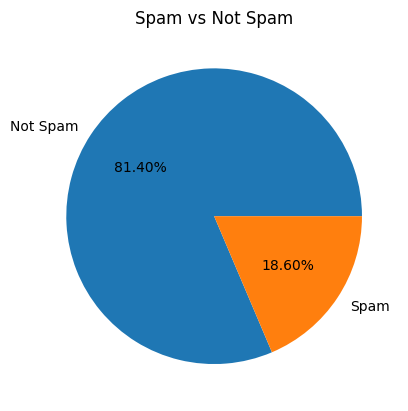

In [14]:
counts = df['spam'].value_counts()
label_map = {1: 'Spam', 0: 'Not Spam'}
labels = [label_map[i] for i in counts.index]

plt.pie(counts,labels=labels,autopct='%0.2f%%')
plt.title('Spam vs Not Spam')
plt.show()
# result shows of imbalance df between not spam and spam

**Tokenization**

In [15]:
# Tokenization
df['num_chars']=df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sen10'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,spam,num_chars,num_words,num_sen10
0,martin lin ' s rotation into jim ' s group hi...,0,1045,203,12
1,"steve leppard hi vince , hr is working on a ...",0,1581,324,13
2,y lei?,0,6,3,1
3,have you always been saying welp?,0,33,7,1
4,do you smoke ? qrklx lookln 4 affordabowl cig...,1,249,45,6


In [16]:
df[['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,10863.000000,10863.000000,10863.000000
mean,847.874620,179.076498,11.101169
std,1652.621015,339.805110,27.507231
min,2.000000,1.000000,1.000000
25%,63.000000,15.000000,1.000000
50%,209.000000,44.000000,4.000000
75%,1025.000000,221.000000,13.000000
max,43928.000000,8471.000000,1565.000000


In [17]:
# Not Spam
df[df['spam'] == 0 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,8842.000000,8842.000000,8842.000000
mean,829.180389,176.868469,10.601335
std,1577.224923,327.835017,28.175488
min,2.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,158.000000,37.000000,3.000000
75%,1079.000000,232.000000,12.000000
max,43928.000000,8471.000000,1565.000000


In [18]:
# Spam
df[df['spam'] == 1 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,2021.000000,2021.000000,2021.000000
mean,929.663038,188.736764,13.287976
std,1946.817412,387.798355,24.254574
min,9.000000,2.000000,1.000000
25%,156.000000,31.000000,3.000000
50%,403.000000,80.000000,7.000000
75%,915.000000,202.000000,13.000000
max,28418.000000,6128.000000,438.000000


<Axes: xlabel='num_chars', ylabel='Count'>

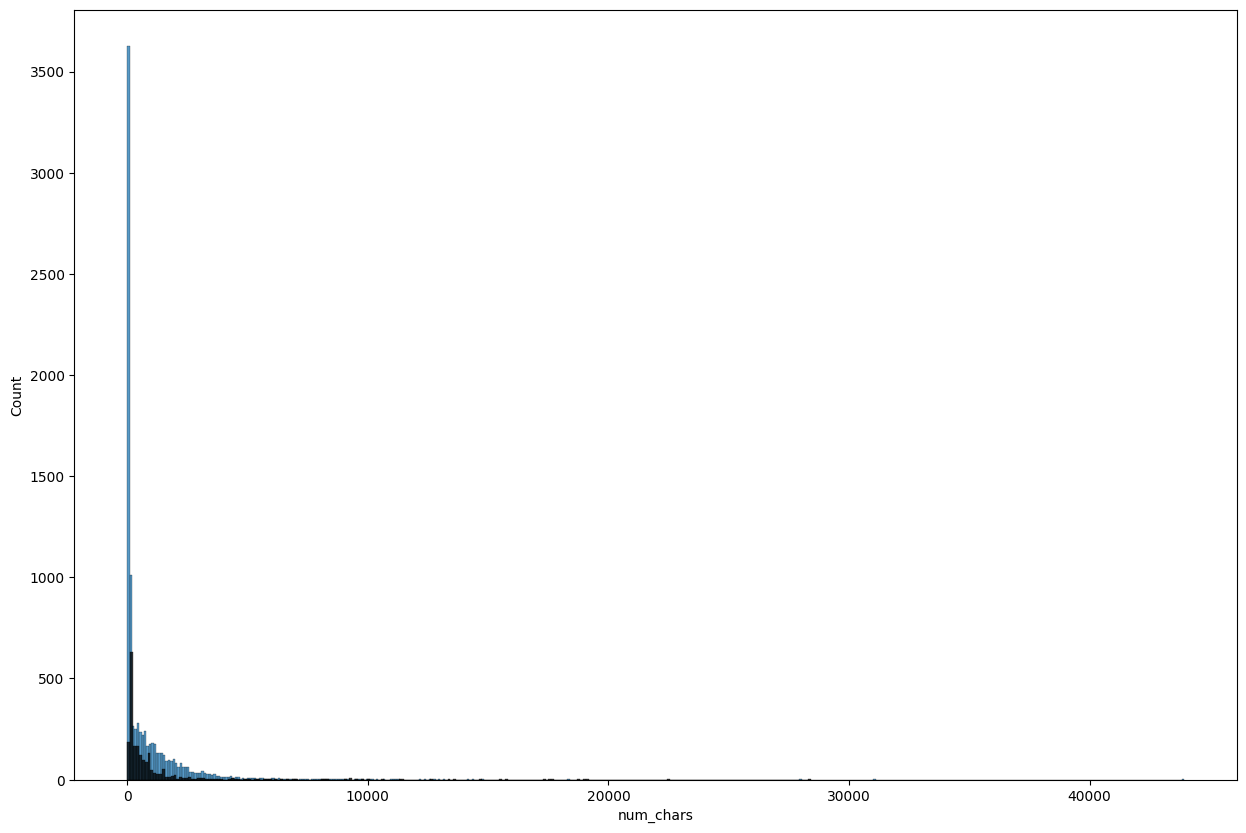

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="black")

<Axes: xlabel='num_chars', ylabel='Count'>

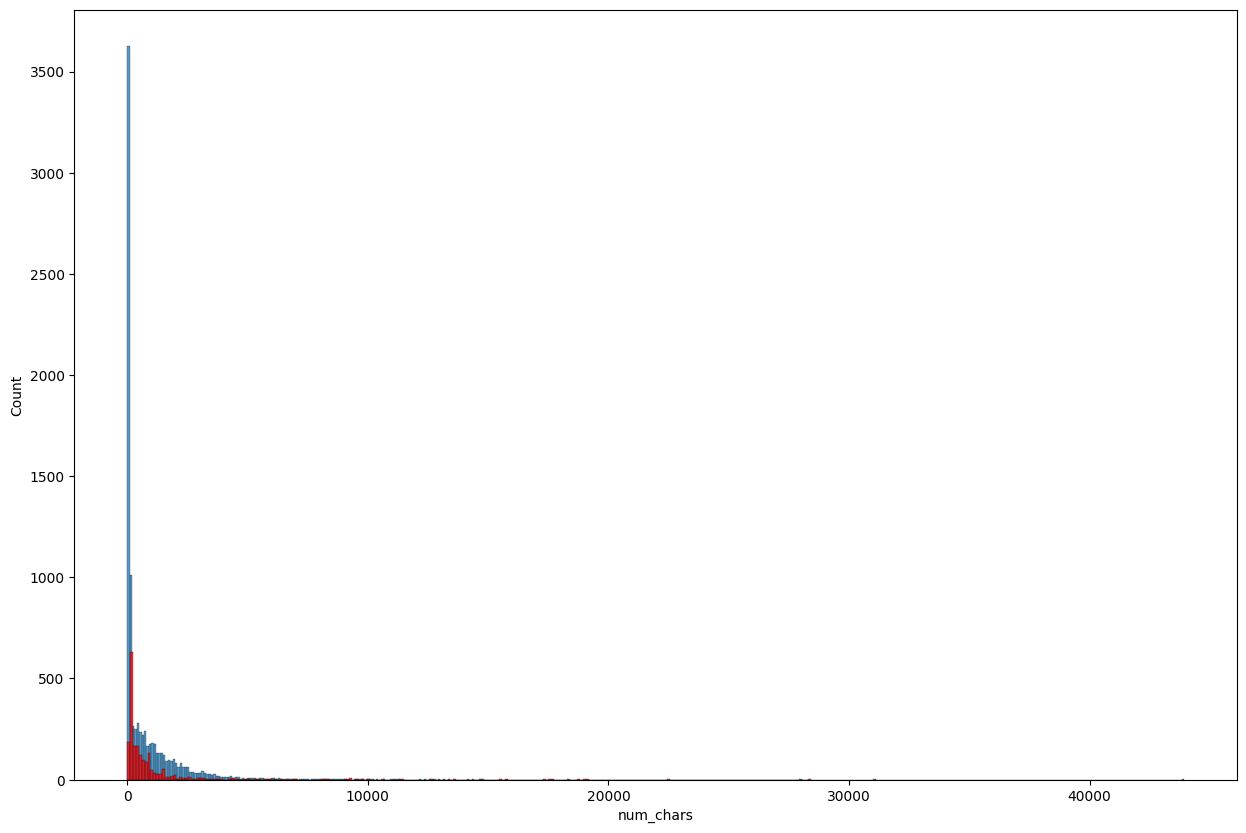

In [20]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")

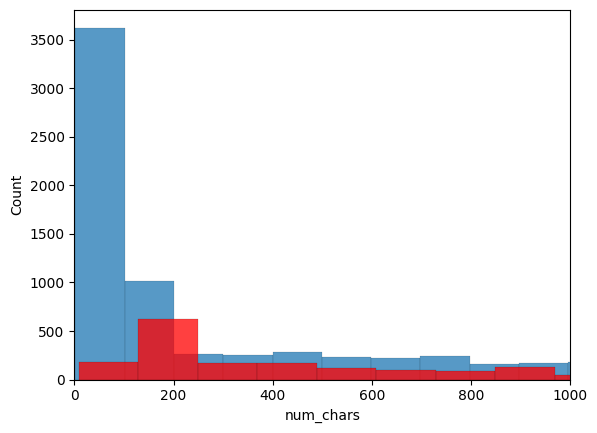

In [21]:
# Spam and snot spam zoom in visualization
sns.histplot(df[df['spam'] == 0]['num_chars'])

# red color = spam
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")
plt.xlim(0, 1000)   # zoom in
plt.show()


<Axes: xlabel='num_sen10', ylabel='Count'>

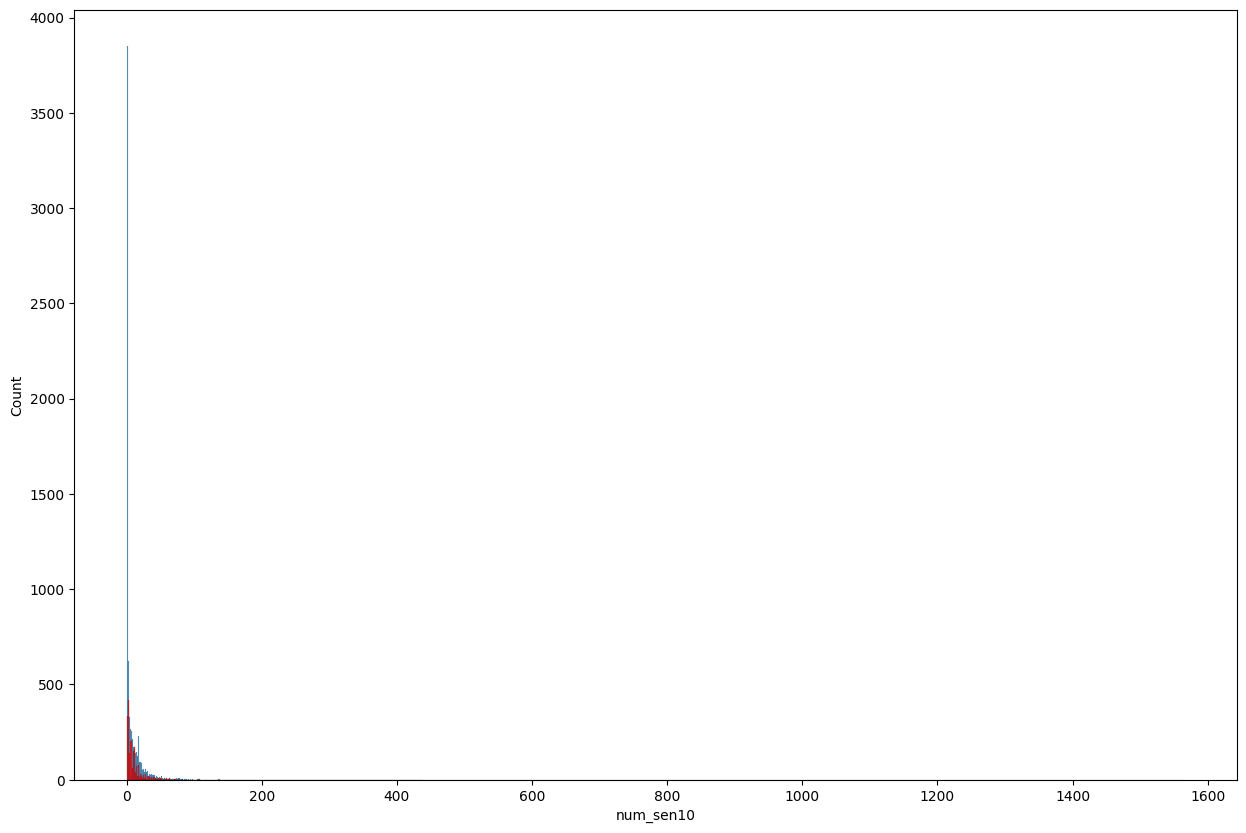

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_sen10'])
sns.histplot(df[df['spam'] == 1]['num_sen10'], color="red")

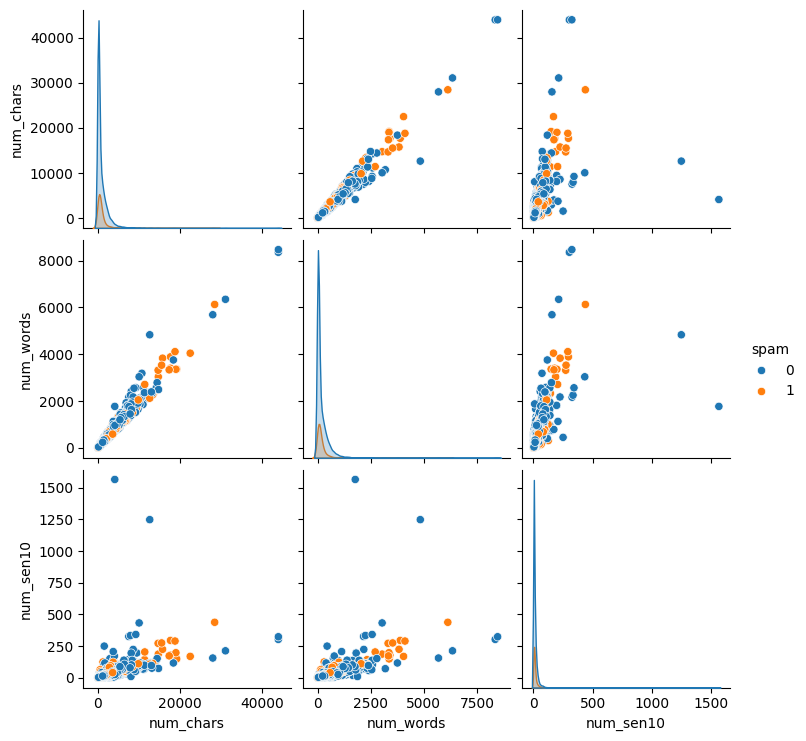

In [23]:
sns.pairplot(df,hue='spam')

In [24]:
# Correlation
corr = df.select_dtypes(include=['number']).corr()
print(corr)

               spam  num_chars  num_words  num_sen10
spam       1.000000   0.023662   0.013592   0.038009
num_chars  0.023662   1.000000   0.988856   0.647457
num_words  0.013592   0.988856   1.000000   0.702594
num_sen10  0.038009   0.647457   0.702594   1.000000


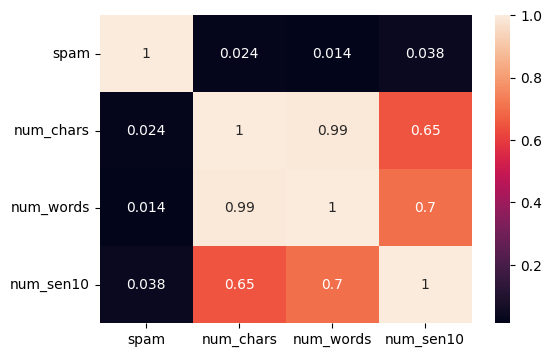

In [25]:
# Heat Map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.show()

# **Data Preprocessing**


Punctuation print test

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Stemming method using PorterStemmer

In [27]:
ps = PorterStemmer()
ps.stem('cooking')

'cook'

**Text Transform Function for Input**

In [28]:
def text_transform(text):
  text = text.lower() #lowercase
  text = nltk.word_tokenize(text) #tokenize

  # remove special chars & stopwords & punctuation & stemming
  b = []
  for a in text:
    if a.isalnum() and a not in stopwords.words('english') and a not in string.punctuation:
      b.append(ps.stem(a))

  return " ".join(b)

In [29]:
# text = df['text'][500]
text = "I loved to play basketball and watching anime. How about you? bro"
text_transform(text)

'love play basketbal watch anim bro'

In [30]:
df["preprocessed_text"] = df['text'].apply(text_transform)
df.head(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,martin lin ' s rotation into jim ' s group hi...,0,1045,203,12,martin lin rotat jim group hi paul anad pleas ...
1,"steve leppard hi vince , hr is working on a ...",0,1581,324,13,steve leppard hi vinc hr work mid year salari ...
2,y lei?,0,6,3,1,lei
3,have you always been saying welp?,0,33,7,1,alway say welp
4,do you smoke ? qrklx lookln 4 affordabowl cig...,1,249,45,6,smoke qrklx lookln 4 affordabowl cigarettez co...
5,yes its possible but dint try. pls dont tell t...,0,57,14,2,ye possibl dint tri pl dont tell one k
6,"houston visit hi vince , sorry that we could...",0,3166,723,73,houston visit hi vinc sorri meet houston hope ...
7,update - reimbursement of individually billed ...,0,2026,352,16,updat reimburs individu bill item use cell pho...
8,jus finished avatar nigro,0,25,4,1,ju finish avatar nigro
9,video conference scheduling hello all : the ...,0,2364,440,19,video confer schedul hello enron corp research...


In [32]:
# Cleaned again for the column['preprocessed_text']
df = df.drop_duplicates(subset='preprocessed_text', keep='first').copy()
df['preprocessed_text'].duplicated().sum()
df.dropna(inplace=True)
df['preprocessed_text'].isnull().sum()

np.int64(0)

**Save the Cleaned and Preprocessed Dataset**

In [33]:
# Double check if null or duplicated
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [91]:
df_clean_small = df[['spam', 'preprocessed_text']].copy()
df_clean = df.copy()

In [95]:
#save the full current dataset with all columns
df_clean.to_csv("dataset/cleaned_dataset_full.csv", index=False)
df_clean.columns

Index(['text', 'spam', 'num_chars', 'num_words', 'num_sen10',
       'preprocessed_text'],
      dtype='object')

In [97]:
# save the small current dataset which have only 2 columns spam and preprocessed_text
df_clean_small.to_csv("dataset/cleaned_dataset_small.csv", index=False)
df_clean_small.columns

Index(['spam', 'preprocessed_text'], dtype='object')

**Spam & Non Spam Text Most_Common_Count and Visualize**

In [96]:
# import the saved cleaned dataset
# df = pd.read_csv("dataset/cleaned_dataset.csv")

In [36]:
from wordcloud import WordCloud

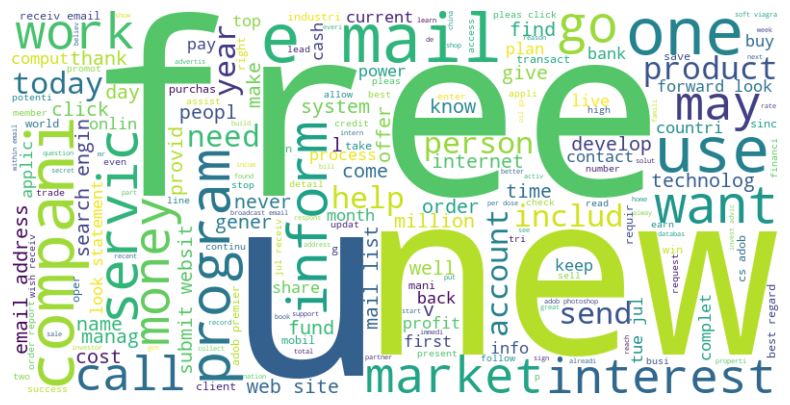

In [37]:
# Generate word cloud only for spam messages
wc = WordCloud(width=800, height=400, background_color='white')
spam_wc = wc.generate(df[df['spam'] == 1]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

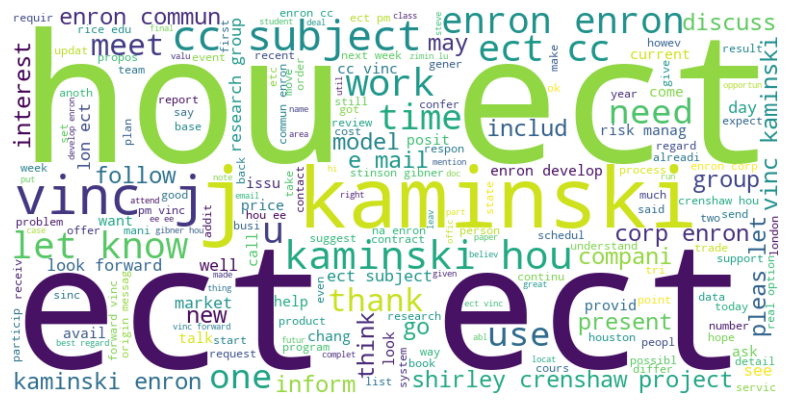

In [38]:
# Generate word cloud only for non spam messages
non_spam_wc = wc.generate(df[df['spam'] == 0]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
spam_corpus = []
for msg in df[df['spam'] == 1]['preprocessed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

182513

In [40]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,compani,1067
1,com,999
2,1,978
3,mail,917
4,busi,896
5,email,866
6,inform,827
7,free,786
8,get,766
9,2,761


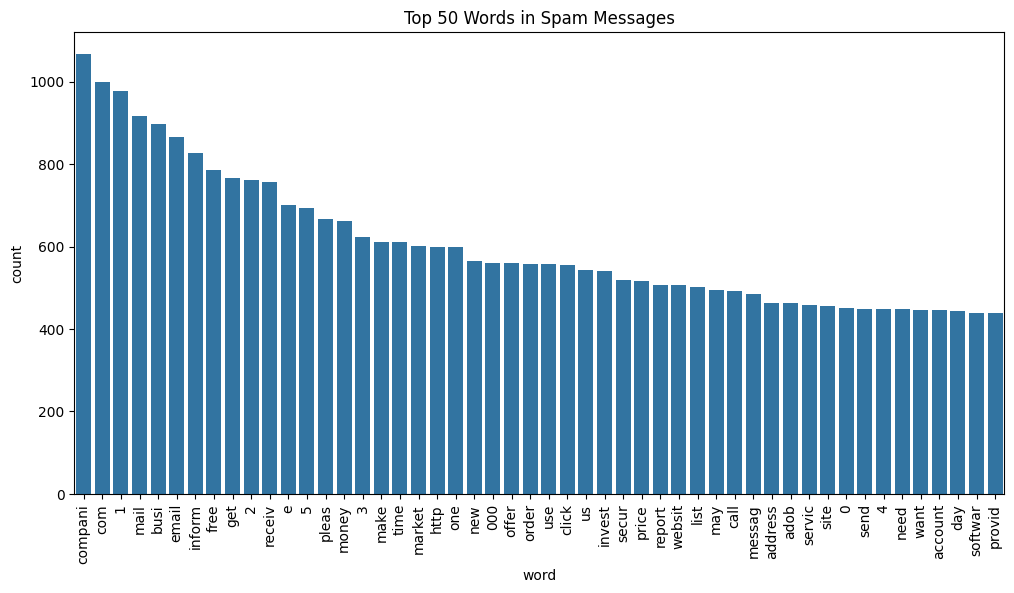

In [41]:
spam_word_counts = Counter(spam_corpus).most_common(50)
df_swc = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_swc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Spam Messages")
plt.show()

In [42]:
df[df['spam'] == 0]['preprocessed_text']

0        martin lin rotat jim group hi paul anad pleas ...
1        steve leppard hi vinc hr work mid year salari ...
2                                                      lei
3                                           alway say welp
5                   ye possibl dint tri pl dont tell one k
                               ...                        
10858    url p http enaresearch dev corp enron com forw...
10859    seek intellig insight look like market distrib...
10860    dun b sad dun thk abt alreadi concentr ur paper k
10862    cool shall go see go tip anyway home got somet...
10863    interest posit alison group need gener peopl a...
Name: preprocessed_text, Length: 8607, dtype: object

In [43]:
non_spam_corpus = []
for msg in df[df['spam'] == 0]['preprocessed_text'].tolist():
    for word in msg.split():
      non_spam_corpus.append(word)

len(non_spam_corpus)

702447

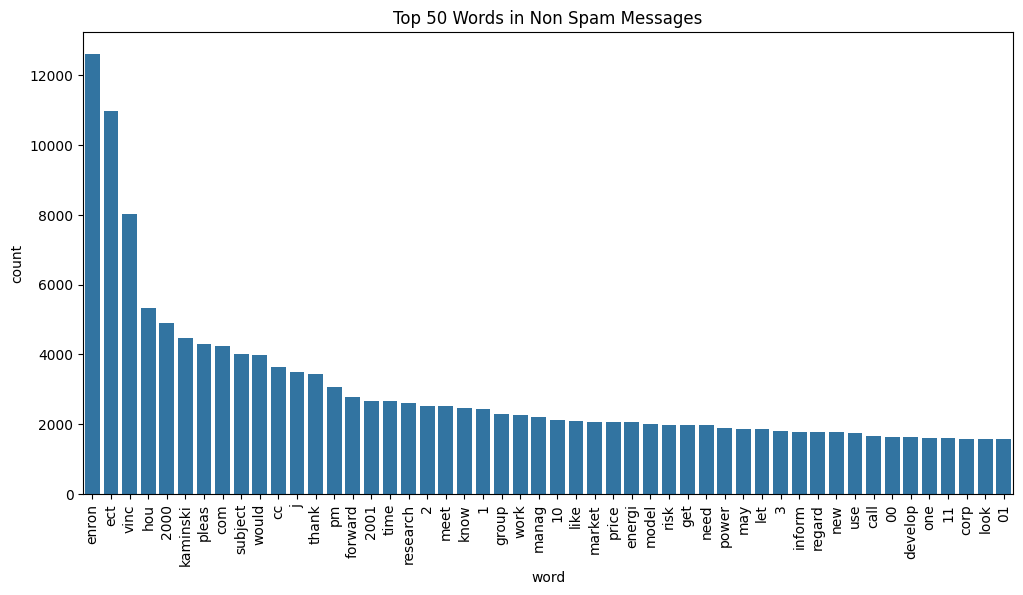

In [44]:
n_spam_word_counts = Counter(non_spam_corpus).most_common(50)
df_nswc = pd.DataFrame(n_spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_nswc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Non Spam Messages")
plt.show()

# **Model Building**

**Indenpendencies for Model**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#dataset spliting
from sklearn.model_selection import train_test_split
#Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
#Evvaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from scipy.stats import mode
from scipy.optimize import linear_sum_assignment
# Balance Data method
from imblearn.over_sampling import RandomOverSampler

In [46]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X = tfidf.fit_transform(df['preprocessed_text']).toarray()

ros = RandomOverSampler(random_state=2)

In [59]:
# X values = preprocessed text or emails
X.shape

(10598, 3000)

In [54]:
# y values = spam labels
y = df['spam'].values
print(y)

[0 0 0 ... 1 0 0]


***Spliting Train = 75% and Test = 25%***

In [56]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=42)
#Balance the dataset
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# ***Training Part***

**MultinomialNB**

In [57]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_bal, y_train_bal)

/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


MultinomialNB(alpha=0.1)

**LogisticRegression**

In [65]:
clf = LogisticRegression(max_iter=300, class_weight='balanced', n_jobs=None)
clf.fit(X_train, y_train)

/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib

LogisticRegression(class_weight='balanced', max_iter=300)

**K-Means**

In [66]:
kmeans= KMeans(n_clusters=2,random_state=2)
kmeans.fit(X)

/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fare

KMeans(n_clusters=2, random_state=2)

# **Evaluation**

In [67]:
# MultinomialNB

y_pred = mnb.predict(X_test)
y_prob = mnb.predict_proba(X_test)[:,1]   # probability for spam

# Evaluate
print("Accuracy      :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("F1-Score      :", f1_score(y_test, y_pred))
print("ROC-AUC       :", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Accuracy      : 0.9033962264150943
Precision     : 0.6519823788546255
Recall        : 0.958963282937365
F1-Score      : 0.7762237762237763
ROC-AUC       : 0.9818799681210688
Confusion Matrix:
 [[1950  237]
 [  19  444]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      2187
           1       0.65      0.96      0.78       463

    accuracy                           0.90      2650
   macro avg       0.82      0.93      0.86      2650
weighted avg       0.93      0.90      0.91      2650



/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-pac

In [68]:
# Logistic Regression

y_pred2 = clf.predict(X_test)
y_prob2 = clf.predict_proba(X_test)[:,1]

# Evaluate (same metrics)
print("Accuracy      :", accuracy_score(y_test, y_pred2))
print("Precision     :", precision_score(y_test, y_pred2))
print("Recall        :", recall_score(y_test, y_pred2))
print("F1-Score      :", f1_score(y_test, y_pred2))
print("ROC-AUC       :", roc_auc_score(y_test, y_prob2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy      : 0.9649056603773585
Precision     : 0.87
Recall        : 0.9395248380129589
F1-Score      : 0.9034267912772586
ROC-AUC       : 0.9876750600692686
Confusion Matrix:
 [[2122   65]
 [  28  435]]


/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-pac

In [69]:
# K-Means Clustering

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['preprocessed_text'])

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

y_true = df['spam'].astype(int).values          # assumes ground-truth in 'spam'
y_cluster = kmeans.labels_

# Use Hungarian algorithm to best match clusters to classes
cont = pd.crosstab(y_true, y_cluster)
row_ind, col_ind = linear_sum_assignment(-cont.values)     # maximise matches
cluster_map = {cont.columns[j]: cont.index[i] for i, j in zip(row_ind, col_ind)}

# Apply mapping to get predicted class labels
y_pred = np.vectorize(cluster_map.get)(y_cluster)

print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=3))
print("Accuracy:", accuracy_score(y_true, y_pred))


Confusion Matrix:
 [[6735 1872]
 [1991    0]]
              precision    recall  f1-score   support

           0      0.772     0.783     0.777      8607
           1      0.000     0.000     0.000      1991

    accuracy                          0.635     10598
   macro avg      0.386     0.391     0.389     10598
weighted avg      0.627     0.635     0.631     10598

Accuracy: 0.6354972636346481


/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/fareachheng/Downloads/Spam_Detect_Project_Final/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/fareach

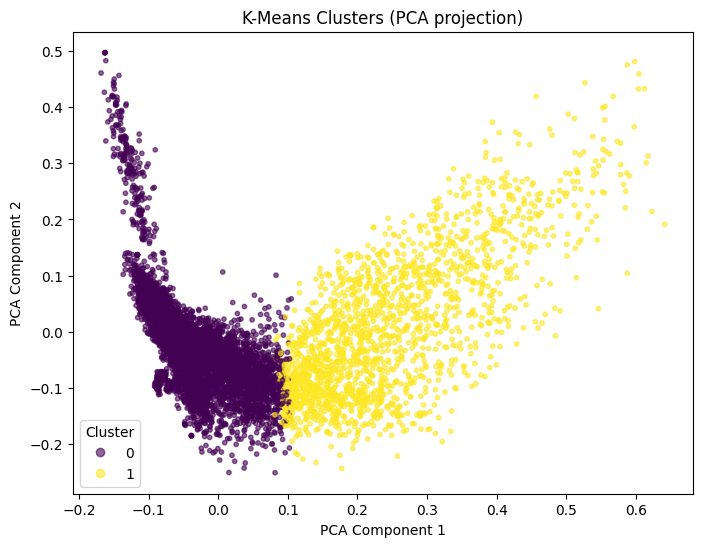

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X.toarray())      # X is the TF-IDF matrix

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_2d[:,0], X_2d[:,1],
    c=y_cluster,
    cmap='viridis', alpha=0.6, s=10
)
plt.title("K-Means Clusters (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

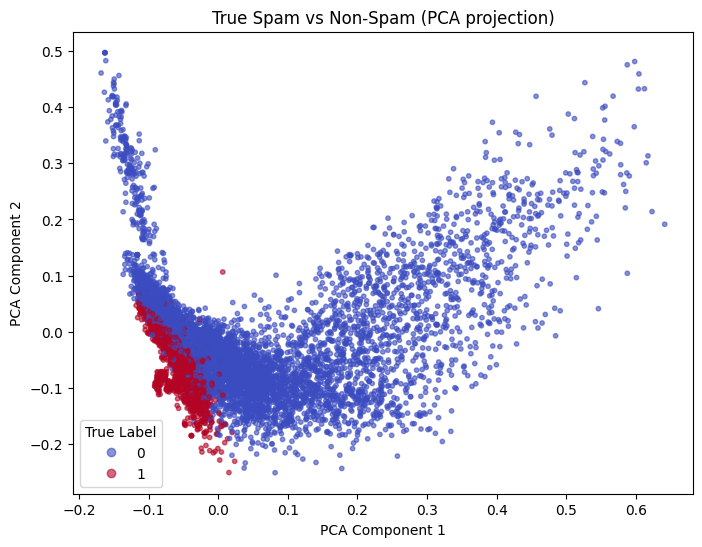

In [71]:
plt.figure(figsize=(8,6))
scatter2 = plt.scatter(
    X_2d[:,0], X_2d[:,1],
    c=y_true,                   # colour by actual labels
    cmap='coolwarm', alpha=0.6, s=10
)
plt.title("True Spam vs Non-Spam (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter2.legend_elements(), title="True Label")
plt.show()

**The Best Performance among three algorithm**  
> **CLF (Logistic Regression)**  

Therefore, I'm gonna use **CLF** for the test case.


***TESTING MODEL PREDICTION***



In [ ]:
num = 1020
mess = df['text'][num]
print(f'Message: "{mess}"')

# Apply your preprocessing
mess = text_transform(mess)

# Convert to vector (same as training!)
mess_vec = tfidf.transform([mess])

#actual
actual = df['spam'][num]
if actual == 1:
  print("Actual: SPAM " )
else:
  print("Actual: NON SPAM ")


# Predict
prediction = clf.predict(mess_vec)
if prediction == 1:
  print("Prediction: SPAM " )
else:
  print("Prediction: NON SPAM ")


Message: "i wan but too early lei... me outside now wun b home so early... neva mind then..."
Actual: NON SPAM 
Prediction: NON SPAM 


**TestCase Example1**

In [79]:
# Example test message
mess = "Congratulations! You have WON a $500 gift card. Click here to claim your prize now!"
print(f'Message: \"{mess}\"')

# Apply preprocessing
mess_clean = text_transform(mess)

# Vectorise using the same fitted TF-IDF
mess_vec = tfidf.transform([mess_clean])

prediction = clf.predict(mess_vec)[0]

# Predict probability for each class
proba = clf.predict_proba(mess_vec)[0]   # returns array like [P(non-spam), P(spam)]

print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")

# Final label
print("Predicted:", "SPAM" if prediction == 1 else "NON-SPAM")

Message: "Congratulations! You have WON a $500 gift card. Click here to claim your prize now!"
Probability of NON-SPAM: 2.20%
Probability of SPAM    : 97.80%
Predicted: SPAM


**TestCase Example2**

In [78]:
mess = "Hi John, I’ll meet you at the cafe at 3pm tomorrow for our project discussion."

print(f'Message: \"{mess}\"')
mess_clean = text_transform(mess)
mess_vec = tfidf.transform([mess_clean])
prediction = clf.predict(mess_vec)[0]
proba = clf.predict_proba(mess_vec)[0]
print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")
print("Predicted:", "SPAM" if prediction == 1 else "NON-SPAM")

Message: "Hi John, I’ll meet you at the cafe at 3pm tomorrow for our project discussion."
Probability of NON-SPAM: 97.76%
Probability of SPAM    : 2.24%
Predicted: NON-SPAM


**TestCase Example3**

In [76]:
test_messages = [
    "You’ve been selected for a limited-time loan offer! Apply today and get cash instantly — click the link now.",
    "Hey Sarah, just checking if you’re free for lunch tomorrow at the new Italian restaurant.",
    "Congratulations 🎉! You’re our lucky winner of a free iPhone 15. Claim your prize before midnight!",
    "Meeting reminder: Don’t forget the team call at 10 AM tomorrow. Please join the Zoom link on time.",
    "URGENT: Your bank account has been locked. Verify your details immediately to avoid suspension."
]

# Create a list to store the cleaned messages
mess_clean = []

for i, msg in enumerate(test_messages):
    print(f"\nMessage {i+1}: {msg}")
    cleaned = text_transform(msg)
    mess_clean.append(cleaned)

    vec = tfidf.transform([cleaned])
    proba = clf.predict_proba(vec)[0]
    pred = clf.predict(vec)[0]

    print(f"Probability NON-SPAM: {proba[0]*100:.2f}%")
    print(f"Probability SPAM    : {proba[1]*100:.2f}%")
    print("Predicted Label:", "SPAM" if pred == 1 else "NON-SPAM")



Message 1: You’ve been selected for a limited-time loan offer! Apply today and get cash instantly — click the link now.
Probability NON-SPAM: 5.81%
Probability SPAM    : 94.19%
Predicted Label: SPAM

Message 2: Hey Sarah, just checking if you’re free for lunch tomorrow at the new Italian restaurant.
Probability NON-SPAM: 67.64%
Probability SPAM    : 32.36%
Predicted Label: NON-SPAM

Message 3: Congratulations 🎉! You’re our lucky winner of a free iPhone 15. Claim your prize before midnight!
Probability NON-SPAM: 4.92%
Probability SPAM    : 95.08%
Predicted Label: SPAM

Message 4: Meeting reminder: Don’t forget the team call at 10 AM tomorrow. Please join the Zoom link on time.
Probability NON-SPAM: 71.77%
Probability SPAM    : 28.23%
Predicted Label: NON-SPAM

Message 5: URGENT: Your bank account has been locked. Verify your details immediately to avoid suspension.
Probability NON-SPAM: 26.70%
Probability SPAM    : 73.30%
Predicted Label: SPAM


**User INPUT to Check Spam Detection**

Replace the text in ***mess variable*** of your choice to check the spam and non spam

In [80]:
#=================================================================

#Replace your text here to check
mess = "example...."

#=================================================================
print(f'Message: \"{mess}\"')
mess_clean = text_transform(mess)
mess_vec = tfidf.transform([mess_clean])
prediction = clf.predict(mess_vec)[0]
proba = clf.predict_proba(mess_vec)[0]
print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")
print("Predicted:", "SPAM" if pred == 1 else "NON-SPAM")

Message: "example...."
Probability of NON-SPAM: 83.97%
Probability of SPAM    : 16.03%
Predicted: SPAM
